# What Makes Movies Earn More Money?
#### Stephanie Qie & Nikhil Pateel

## Introduction

Movies play an important role in today's popular culture and media, as they are one of the largest forms of entertainment and one of the most profitable industries in our society.

From large movie studios to movie analysts, many people have tried to analyze what makes a movie earn more money.

In this tutorial, we will ....


## 0.0 - Required Libraries

We need the following libraries
+ `pandas` - For storing data
+ `matplotlib` - For plotting data
+ `sci-kit learn` - has a variety of 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm
import requests
import numpy as np

## 1.0 Dataset Source

Our dataset comes from the following source
+ [kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

## 1.1 Grabbing Data

Load the .csv files which we downloaded from kaggle, and display the first few rows to have a general understanding of the data.

In [3]:
df = pd.read_csv('tmdb_5000_movies.csv')
cast = pd.read_csv('tmdb_5000_credits.csv')

display(df.head())
display(cast.head())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## 1.3 Tidying Data

Joined the two tables by movie title, so that all of the data is in one table.

In [4]:
df = df.set_index('original_title').join(cast.set_index('title'))
df = df.reset_index()
display(df.head())

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,#Horror,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,"[{""name"": ""AST Studios"", ""id"": 75277}, {""name""...",...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de..."
1,$upercapitalist,0,"[{""id"": 53, ""name"": ""Thriller""}]",http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,[],...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,NaN
2,(500) Days of Summer,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...",...,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de..."
3,...E tu vivrai nel terrore! L'aldilà,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,19204,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 1706, ""n...",it,A young woman inherits an old hotel in Louisia...,8.022122,"[{""name"": ""Fulvia Film"", ""id"": 13682}]",...,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The seven dreaded gateways to Hell are conceal...,The Beyond,6.6,117,NaN,NaN,NaN
4,10 Cloverfield Lane,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,"After a car accident, Michelle awakens to find...",53.698683,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,333371.0,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de..."


As seen in the table above, some of the columns (ie. genres, production companies, production countries, spoken languages, cast, and crew) have more than element per cell. We will be converting those cells into data structures to make it easier to access all of the data in those cells.

First we will modify the genres. As shown below, a movie can have multiple genres, and each genre contains an id and name. We will make it so that for each movie, all of their genres are stored in an array, and each genre element will be a dictionary with keys for its id and name.

In [5]:
df.iloc[0]["genres"]

'[{"id": 18, "name": "Drama"}, {"id": 9648, "name": "Mystery"}, {"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]'

In [6]:
import re

#go through each row
for index, row in df.iterrows():
    
    genres = []
    line = row["genres"]
    cur_genres = line.split('},')
    
    del cur_genres[-1]
  
    #transform info for each genre
    for genre in cur_genres:
        m = re.search("(\d+), \"name\": \"(\w+)", genre)
        cur_id = m.groups()[0]
        cur_name = m.groups()[1]
        
        cur_info = {}
        cur_info["id"] = cur_id
        cur_info["name"] = cur_name
        
        genres.append(cur_info)
        
    df.at[index, "genres"] = genres

Next we will modify the production companies. As shown below, a movie can have multiple production companies, and each production company has a name and id. We will make it so that for each movie, all of their production companies are stored in an array, and each production company element will be a dictionary with keys for its name and id.

In [7]:
df.iloc[0]["production_companies"]

'[{"name": "AST Studios", "id": 75277}, {"name": "Lowland Pictures", "id": 75278}]'

In [8]:
#go through each row
for index, row in df.iterrows():
    
    p_comps = []
    line = row["production_companies"]
    cur_p_comps = line.split('},')
    
    del cur_p_comps[-1]
  
    #transform info for each genre
    for p_comp in cur_p_comps:
        m = re.search("name\": \"(.+)\", \"id\": (\d+)", p_comp)
        cur_name = m.groups()[0]
        cur_id = m.groups()[1]
        
        cur_info = {}
        cur_info["name"] = cur_name
        cur_info["id"] = cur_id
        
        p_comps.append(cur_info)
        
    df.at[index, "production_companies"] = p_comps

Next we will modify the production countries. As shown below, a movie can have multiple production countries, and each production country has an iso_3166_1 and a name.

In [9]:
df.iloc[0]["production_countries"]

'[{"iso_3166_1": "US", "name": "United States of America"}]'

In [10]:
#go through each row
for index, row in df.iterrows():
    
    p_countries = []
    line = row["production_countries"]
    cur_p_countries = line.split('},')
    
    del cur_p_countries[-1]
  
    #transform info for each genre
    for p_country in cur_p_countries:
        m = re.search("\"iso_3166_1\": \"(.+)\", \"name\": \"(.+)\"", p_country)
        cur_iso_3166_1 = m.groups()[0]
        cur_name = m.groups()[1]
        
        cur_info = {}
        cur_info["iso_3166_1"] = cur_iso_3166_1
        cur_info["name"] = cur_name
        
        p_countries.append(cur_info)
        
    df.at[index, "production_countries"] = p_countries

Next we will modify the spoken languages. As shown below, a movie can have multiple spoken languages, and each spoken language has an iso_639_1 and a name.

In [11]:
df.iloc[0]["spoken_languages"]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

In [12]:
#go through each row
for index, row in df.iterrows():
    
    s_langs = []
    line = row["spoken_languages"]
    cur_s_langs = line.split('},')
    
    del cur_s_langs[-1]
  
    #transform info for each genre
    for s_lang in cur_s_langs:
        
        m = re.search("\"iso_639_1\": \"(.*)\", \"name\": \"(.*)\"", s_lang)
        
        cur_iso_639_1 = m.groups()[0]
        cur_name = m.groups()[1]

        cur_info = {}
        cur_info["iso_639_1"] = cur_iso_639_1
        cur_info["name"] = cur_name

        s_langs.append(cur_info)
        
    df.at[index, "spoken_languages"] = s_langs
    
display(df.head())

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,#Horror,1500000,"[{'id': '18', 'name': 'Drama'}, {'id': '9648',...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,"[{'name': 'AST Studios', 'id': '75277'}]",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de..."
1,$upercapitalist,0,[],http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,[],...,103.0,[],Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,NaN
2,(500) Days of Summer,7500000,"[{'id': '35', 'name': 'Comedy'}, {'id': '18', ...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{'name': 'Fox Searchlight Pictures', 'id': '4...",...,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de..."
3,...E tu vivrai nel terrore! L'aldilà,0,[],NaN,19204,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 1706, ""n...",it,A young woman inherits an old hotel in Louisia...,8.022122,[],...,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The seven dreaded gateways to Hell are conceal...,The Beyond,6.6,117,NaN,NaN,NaN
4,10 Cloverfield Lane,15000000,"[{'id': '53', 'name': 'Thriller'}, {'id': '878...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,"After a car accident, Michelle awakens to find...",53.698683,"[{'name': 'Paramount Pictures', 'id': '4'}, {'...",...,103.0,[],Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,333371.0,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de..."


Next we will modify the cast. As shown below, a movie has multiple cast members, and each member has a cast_id, a character, a credit_id, a gender, an id, a name, and an order.

In [13]:
df.iloc[0]["cast"]

'[{"cast_id": 0, "character": "Alex\'s 12-Step Friend", "credit_id": "545bba84c3a3685358001b80", "gender": 1, "id": 343, "name": "Taryn Manning", "order": 1}, {"cast_id": 1, "character": "Sam\'s Mom", "credit_id": "545bba8a0e0a261fad0023f6", "gender": 1, "id": 10871, "name": "Natasha Lyonne", "order": 2}, {"cast_id": 2, "character": "Alex Cox", "credit_id": "545bba8fc3a36853500018a4", "gender": 1, "id": 2838, "name": "Chlo\\u00eb Sevigny", "order": 3}, {"cast_id": 3, "character": "Mr. Cox", "credit_id": "545bba94c3a3685353001a56", "gender": 2, "id": 9296, "name": "Balthazar Getty", "order": 4}, {"cast_id": 4, "character": "Dr. White", "credit_id": "545bba990e0a261fb900220b", "gender": 2, "id": 16327, "name": "Timothy Hutton", "order": 5}, {"cast_id": 5, "character": "Lisa", "credit_id": "545bba9ec3a368535d001e67", "gender": 1, "id": 210573, "name": "Lydia Hearst", "order": 6}, {"cast_id": 6, "character": "Mom", "credit_id": "545bbaa4c3a368535d001e6b", "gender": 0, "id": 180425, "name":

In [14]:
#go through each row
for index, row in df.iterrows():
    
    casts = []
    line = str(row["cast"])
    cur_casts = line.split('},')
    
    del cur_casts[-1]
  
    #transform info for each genre
    for cast in cur_casts:
       
        m = re.search("cast_id\": (\d*), \"character\": \"(.*)\", \"credit_id\": \"(.*)\", \"gender\": (.*), \"id\": (\d*), \"name\": \"(.*)\", \"order\": (.*)", cast)
       
        cur_cast_id = m.groups()[0]
        cur_character = m.groups()[1]
        cur_credit_id = m.groups()[2]
        cur_gender = m.groups()[3]
        cur_id = m.groups()[4]
        cur_name = m.groups()[5]
        cur_order = m.groups()[6]

        cur_info = {}
        cur_info["cast_id"] = cur_cast_id
        cur_info["character"] = cur_character
        cur_info["credit_id"] = cur_credit_id
        cur_info["gender"] = cur_gender
        cur_info["id"] = cur_id
        cur_info["name"] = cur_name
        cur_info["order"] = cur_order

        casts.append(cur_info)
        
    df.at[index, "production_countries"] = casts

Next we will modify the crew. As shown below, each crew has multiple members, and each member has a credit_id, a department, a gender, an id, a job, and a name.

In [15]:
df.iloc[0]["crew"]

'[{"credit_id": "545bbac70e0a261fb6002329", "department": "Writing", "gender": 1, "id": 61111, "job": "Screenplay", "name": "Tara Subkoff"}, {"credit_id": "545bbabf0e0a261fb9002212", "department": "Directing", "gender": 1, "id": 61111, "job": "Director", "name": "Tara Subkoff"}, {"credit_id": "545bbae4c3a36853500018a8", "department": "Production", "gender": 1, "id": 61111, "job": "Producer", "name": "Tara Subkoff"}, {"credit_id": "545bbad3c3a3685358001b92", "department": "Production", "gender": 0, "id": 1382445, "job": "Producer", "name": "Jason Ludman"}, {"credit_id": "545bbadbc3a368535d001e74", "department": "Production", "gender": 0, "id": 1382446, "job": "Producer", "name": "Oren Segal"}, {"credit_id": "545bbaf3c3a3685358001b9d", "department": "Production", "gender": 0, "id": 1382448, "job": "Producer", "name": "Brendan Walsh"}]'

In [16]:
#go through each row
for index, row in df.iterrows():
    
    crews = []
    line = str(row["crew"])
    cur_crews = line.split('},')
    
    del cur_crews[-1]
   
    #transform info for each genre
    for crew in cur_crews:
        
        m = re.search("credit_id\": (.*), \"department\": \"(.*)\", \"gender\": (.*), \"id\": (.*), \"job\": (.*), \"name\": (.*)\"", crew)
       
        cur_credit_id = m.groups()[0]
        cur_department = m.groups()[1]
        cur_gender = m.groups()[2]
        cur_id = m.groups()[3]
        cur_job = m.groups()[4]
        cur_name = m.groups()[5]

        cur_info = {}
        cur_info["credit_id"] = cur_credit_id
        cur_info["department"] = cur_department
        cur_info["gender"] = cur_gender
        cur_info["id"] = cur_id
        cur_info["job"] = cur_job
        cur_info["name"] = cur_name

        crews.append(cur_info)
        
    df.at[index, "crew"] = crews

In [17]:
display(df.head())

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,#Horror,1500000,"[{'id': '18', 'name': 'Drama'}, {'id': '9648',...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,"[{'name': 'AST Studios', 'id': '75277'}]",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{'credit_id': '""545bbac70e0a261fb6002329""', '..."
1,$upercapitalist,0,[],http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,[],...,103.0,[],Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,[]
2,(500) Days of Summer,7500000,"[{'id': '35', 'name': 'Comedy'}, {'id': '18', ...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{'name': 'Fox Searchlight Pictures', 'id': '4...",...,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{'credit_id': '""52fe47f99251416c750abaa5""', '..."
3,...E tu vivrai nel terrore! L'aldilà,0,[],NaN,19204,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 1706, ""n...",it,A young woman inherits an old hotel in Louisia...,8.022122,[],...,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The seven dreaded gateways to Hell are conceal...,The Beyond,6.6,117,NaN,NaN,[]
4,10 Cloverfield Lane,15000000,"[{'id': '53', 'name': 'Thriller'}, {'id': '878...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,"After a car accident, Michelle awakens to find...",53.698683,"[{'name': 'Paramount Pictures', 'id': '4'}, {'...",...,103.0,[],Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,333371.0,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{'credit_id': '""57627624c3a3680682000872""', '..."


The final tidied table is shown above. Now, we will being doing exploratory analysis on our data.

## 2.0 - Exploratory Data Analysis

In [18]:
df['missing'] = 0

genres = []
revenues = []

#get the genre and revenue data from the table
for index, row in df.iterrows():
    l = list(map(lambda e: e['name'],row['genres']))
    genres += l;
    revenues += [row['revenue']] * len(row['genres'])

#find the missing data in the table    
for index, row in df.iterrows():
    
    missing = 0
    
    #if the budget is missing
    if row['budget'] == 0:
        missing += 1
        
    #if the genres are missing    
    if row['genres'] == []:
        missing += 1
        
    #if the homepage is missing    
    if row['homepage'] == np.NaN:
        missing += 1
        
    #if the keywords are missing    
    if row['keywords'] == []:
        missing += 1
        
    #if the production companies are missing    
    if row['production_companies'] == []:
        missing += 1
        
    #if the production countries are missing    
    if row['production_countries'] == []:
        missing += 1
        
    #if the spoken languages are missing    
    if row['spoken_languages'] == []:
        missing += 1
        
    #if the revenue is missing    
    if row['revenue'] == 0:
        missing += 1 
        
    #if the tagline is missing    
    if row['tagline'] == np.NaN:
        missing += 1
        
    #if the cast info is missing    
    if row['cast'] == np.NaN:
        missing += 1
        
    #if the crew info is missing    
    if row['crew'] == np.NaN:
        missing += 1
    
    df.at[index, 'missing'] = missing

In [19]:
display(df.corr())

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,missing
budget,1.000000,-0.089163,0.505545,0.730603,0.269966,0.093112,0.593224,-0.086309,-0.422248
id,-0.089163,1.000000,0.031267,-0.050527,-0.153521,-0.270644,-0.004113,0.999903,0.241596
popularity,0.505545,0.031267,1.000000,0.644725,0.225761,0.273952,0.778214,0.044541,-0.331544
revenue,0.730603,-0.050527,0.644725,1.000000,0.251344,0.197337,0.781471,-0.046466,-0.324332
runtime,0.269966,-0.153521,0.225761,0.251344,1.000000,0.375036,0.272258,-0.157726,-0.291237
vote_average,0.093112,-0.270644,0.273952,0.197337,0.375036,1.000000,0.313024,-0.267474,-0.290222
vote_count,0.593224,-0.004113,0.778214,0.781471,0.272258,0.313024,1.000000,0.005814,-0.328812
movie_id,-0.086309,0.999903,0.044541,-0.046466,-0.157726,-0.267474,0.005814,1.000000,0.239065
missing,-0.422248,0.241596,-0.331544,-0.324332,-0.291237,-0.290222,-0.328812,0.239065,1.000000


(array([3.54e+03, 7.73e+02, 2.50e+02, 1.42e+02, 5.10e+01, 3.40e+01,
        1.40e+01, 3.00e+00, 0.00e+00, 1.00e+00]),
 array([0.00e+00, 3.80e+07, 7.60e+07, 1.14e+08, 1.52e+08, 1.90e+08,
        2.28e+08, 2.66e+08, 3.04e+08, 3.42e+08, 3.80e+08]),
 <a list of 10 Patch objects>)

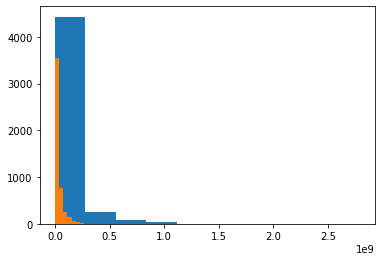

In [20]:
#histogram for the revenue and budget

sort = df.sort_values('revenue', ascending=False )

plt.figure()
plt.hist(df['revenue'])
plt.hist(df['budget'])

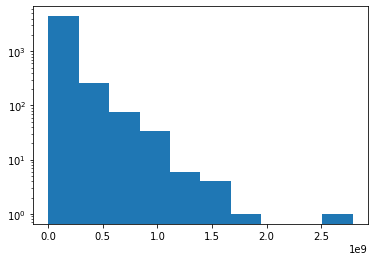

In [21]:
#histogram for revenue 

plt.figure()
display()
n, bins, patches = plt.hist(df['revenue'], log=True)

In [22]:
genre_revenue = {}
genre_count = {}

data = {'genre' : genres, 'revenue' : revenues}
data = pd.DataFrame(data)

#get the data
for index, row in data.iterrows():
    
    cur_genre = row["genre"]
    cur_revenue = row["revenue"]
    
    #if has seen the genre before
    if cur_genre in genre_revenue:
        genre_revenue[cur_genre] += cur_revenue
        genre_count[cur_genre] += 1
        
    #if haven't seen the genre before    
    else:
        genre_revenue[cur_genre] = cur_revenue
        genre_count[cur_genre] = 1
        
genre_avg_revenue = {}

#calculate the average revenue for each genre
for genre in genre_revenue.keys():
    genre_avg_revenue[genre] = genre_revenue[genre] / genre_count[genre]
    
genre_avg_revenue    

{'Drama': 57376553.47837658,
 'Mystery': 67282364.09047619,
 'Horror': 48367807.523545705,
 'Comedy': 71271402.55693069,
 'Thriller': 90793990.08482143,
 'Science': 149063947.25941423,
 'Romance': 75284527.87214611,
 'Action': 134062717.15583174,
 'Crime': 61121216.74222222,
 'Adventure': 205881389.34361234,
 'Fantasy': 184920267.51546392,
 'History': 62803934.0,
 'Documentary': 22229625.884615384,
 'Music': 56522535.80487805,
 'War': 70635276.14285715,
 'Animation': 232988795.21126762,
 'Family': 176326254.23076922,
 'Western': 69494073.4,
 'Foreign': 1014316.8181818182,
 'TV': 0.0}

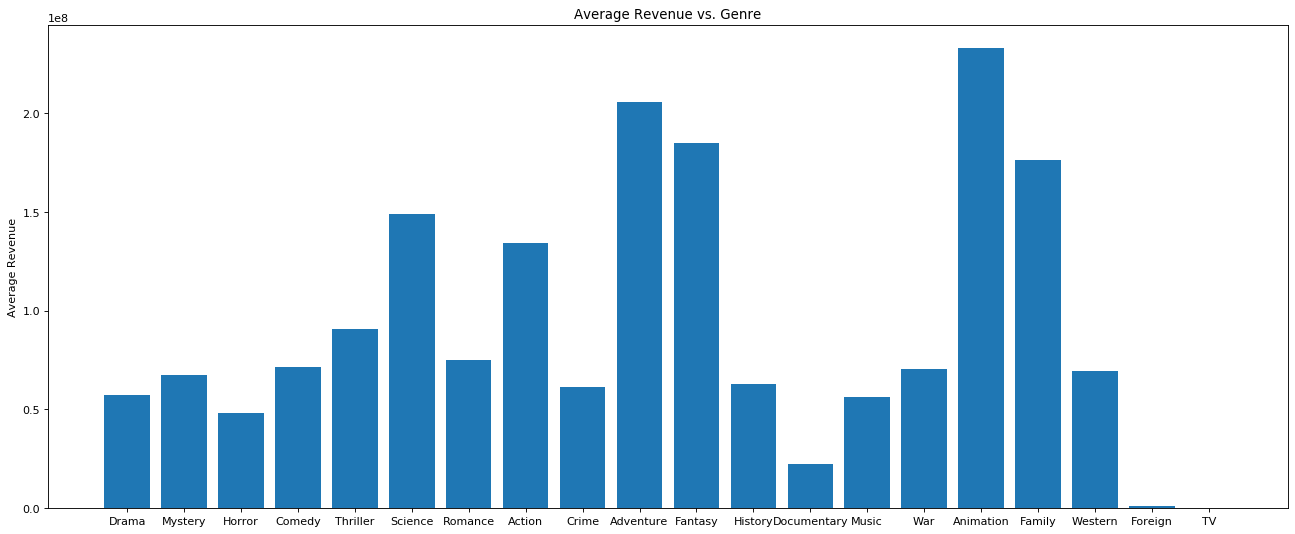

In [23]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

objects = genre_avg_revenue.keys()
y_pos = np.arange(len(objects))
performance = genre_avg_revenue.values()

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Average Revenue')
plt.title('Average Revenue vs. Genre')

plt.show()

<BarContainer object of 10 artists>

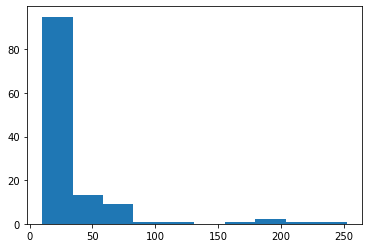

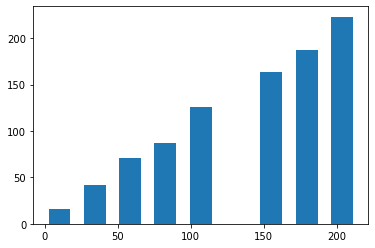

In [47]:
#calculate all occurences for each production company

all_prod_comps = {}

for index, row in df.iterrows():
    prod_comps = row["production_companies"]
    
    for p_c in prod_comps:
        if p_c["name"] in all_prod_comps:
            all_prod_comps[p_c["name"]] += 1
        else:
            all_prod_comps[p_c["name"]] = 1
        
all_prod_comps
reduced = dict( (key, value) for (key, value) in all_prod_comps.items() if value >= 10 )
n, bins, patches = plt.hist(reduced.values())
x = []
y = []
for i in range(len(bins) - 1):
    start = bins[i]
    end = bins[i+1]
    x.append(start)
    reduced = list(  value for (key, value) in all_prod_comps.items() if value >= start and value < end )
    y.append(np.mean(reduced))

plt.figure()
plt.bar(x,y, width=15)


## 3.0 - Analysis

In [86]:
len(set(all_prod_comps))

3175

## Insights